# Dynamic Data Visualization: Utilizing Code to Analyze NOAA/ NOS Data during            Hurricane Ian
## - Plot NOAA/NOS Data in Python with animations

#### This notebook will show users how to access NOS data from the CO-OPS API URL Builder and how to create simple plots as well as animated plots with the data

Created by MaKenna Collins, NOAA EPP/MSI Intern, Summer 2023

*This notebook was last updated July 27, 2023*

NOAA’s Center for Operational Oceanographic Products and Services (CO-OPS) maintains an observation network of over 200 permanent water level stations on the coasts and Great Lakes. This data is accessible through CO-OPS APIs as explained in this Jupyter Notebook using data from Hurricane Ian as an example. CO-OPS tracks water levels during tropical cyclones in real-time through the CO-OPS’ Coastal Inundation Dashboard web mapping application. This tool allows users to monitor elevated water level conditions along the coast when a tropical storm or hurricane watch or warning is issued. During Hurricane Ian, CO-OPS’ stations along the coast captured significant water levels at many locations as can be seen on the CO-OPS' Post-Event Peak Water Levels at NOS Stations web mapping application. The water level observations provide insight into the devastating impacts that Hurricane Ian had on the communities in its path and are critical for National Weather Service (NWS) hurricane specialists at the National Hurricane Center (NHC) who use the data for storm surge forecast validation in real-time.

## Step 1: Importing libraries
### You will need the following packages
 - requests
 - pandas
 - numpy
 - matplotlib

In [1]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, dates
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, FFMpegWriter

import warnings
warnings.filterwarnings('ignore')

## Step 2: Accessing CO-OPS Data API URL Builder

Input and output documentation can be found on the [CO-OPS Data API](https://api.tidesandcurrents.noaa.gov/api/prod/), [CO-OPS Derived Product API v0.1](https://api.tidesandcurrents.noaa.gov/dpapi/prod/) and the [CO-OPS Metadata API](https://api.tidesandcurrents.noaa.gov/mdapi/prod/).

Standard templates are available within the CO-OPS API URL Builder, but this notebook is designed to give you more flexiblity through building our own API template to generate queries from our Data API, MetaData API, and Derived Product API.

Here is the link to the CO-OPS API URL Builder website:
https://tidesandcurrents.noaa.gov/api-helper/url-generator.html

#### For this task you will need to navigate to the data API tab and enter the following parameters:
 - Station ID
 - Product
 - Date
 - Datum
 - Time Zone
 - Output Format
 - Data Units
 - Application (optional)
 #### From here, you can choose to save, copy, or submit the URL. Submitting the URL will open a new window that displays all of the data from the parameters. 
 #### Copy the URL to use in your code

## Step 3: Defining variables & creating dataframe

In [2]:
    ## paste the URL from the URL builder
    ## this is the url for water level data
api = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date=20220928&end_date=20220929&station=8725520&product=water_level&datum=MHHW&time_zone=gmt&units=english&format=json#api'
#api

In [3]:
    ## this is where the API is being accessed and data is being retrieved 
response = requests.get(api)
content = response.json()

content1 = content['metadata']
#content1

content2 = content['data']
#content2 

In [4]:
    ## create dataframe for data (content2)
df = pd.DataFrame(content2, columns = ['t', 'v'])

    ## rename columns
df.rename(columns = {'t':'datetime', 'v':'Water Level'}, inplace = True)

    ## set index to datetime column
df.set_index('datetime')
df.index = pd.to_datetime(df.datetime)

    ## drop other column called datetime
df.drop(labels = None, axis = 1, index = None, columns = ['datetime'], inplace = True)

    ## change type of data from object to float 
df['Water Level'] = df['Water Level'].astype(float)

df

,Water Level
datetime,
2022-09-28 00:00:00,-0.509
2022-09-28 00:06:00,-0.512
2022-09-28 00:12:00,-0.502
2022-09-28 00:18:00,-0.522
2022-09-28 00:24:00,-0.505
...,...
2022-09-29 23:30:00,0.810
2022-09-29 23:36:00,0.791
2022-09-29 23:42:00,0.794


In [5]:
    ## uncomment the following lines to display water level data only
    
# df.plot(color = 'blue')
# plt.xlabel('Date')
# plt.ylabel('Water Level (MHHW)')
# plt.title('Water Level at Fort Meyers during Hurricane Ian 09/28/2022 - 09/29/2022')

## Follow steps 1 - 3 to get data for the air pressure

In [6]:
    ## this is the url for air pressure data
api2 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date=20220928&end_date=20220929&station=8725520&product=air_pressure&time_zone=gmt&units=english&format=json#api2'
#api2

    ## this is where the API is being accessed and data is being retrieved
response = requests.get(api2)
contents = response.json()
#contents 

contents1 = contents['metadata']
#contents1

contents2 = contents['data']
#contents2

    ## create dataframe
df2 = pd.DataFrame(contents2, columns = ['t', 'v'])

    ## rename columns 
df2.rename(columns = {'t':'datetime', 'v':'Air Pressure'}, inplace = True)

    ## set index to datetime column 
df2.set_index('datetime')
df2.index = pd.to_datetime(df2.datetime)

    ## drop other datetime column 
df2.drop(labels = None, axis = 1, index = None, columns = ['datetime'], inplace = True)

    ## some data is not available so this line of code is needed to account for the missing values
df2 = df2.replace('', np.nan, regex=True)

    ## change type from object to float
df2['Air Pressure'] = df2['Air Pressure'].astype(float)

df2    

,Air Pressure
datetime,
2022-09-28 00:00:00,1007.6
2022-09-28 00:06:00,1007.5
2022-09-28 00:12:00,1007.8
2022-09-28 00:18:00,1007.4
2022-09-28 00:24:00,1007.3
...,...
2022-09-29 23:30:00,1006.6
2022-09-29 23:36:00,1006.7
2022-09-29 23:42:00,1006.9


### Follow steps 1 - 3 to get data for wind

In [7]:
    ## this is the url for wind data
api3 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date=20220928&end_date=20220929&station=8725520&product=wind&time_zone=gmt&units=english&format=json#api3'
#api3

    ## this is where the API is being accessed and data is being retrieved 
response = requests.get(api3)
contents = response.json()
#contents

contents1 = contents['metadata']
#contents1

contents2 = contents['data']
#contents2

    ## create dataframe
df3 = pd.DataFrame(contents2, columns = ['t', 's', 'd', 'dr', 'g'])

    ## rename columns
df3.rename(columns = {'t':'datetime', 's': 'speed', 'd': 'direction', 'dr':'cardinal direction', 'g':'gust'}, inplace = True)
    
    ## set index to datetime column
df3.set_index('datetime')
df3.index = pd.to_datetime(df3.datetime)
    
    ## drop other datetime column 
df3.drop(labels = None, axis = 1, index = None, columns = ['datetime'], inplace = True)
    
    ## some data is not available so this line of code is needed to account for the missing values
df3 = df3.replace('', np.nan, regex=True)
    
    ## change data to numeric data 
df3['direction'] = pd.to_numeric(df3['direction'])
df3['speed'] = pd.to_numeric(df3['speed'])

df3

,speed,direction,cardinal direction,gust
datetime,,,,
2022-09-28 00:00:00,11.66,71.0,ENE,17.49
2022-09-28 00:06:00,10.11,66.0,ENE,17.11
2022-09-28 00:12:00,10.50,78.0,ENE,17.30
2022-09-28 00:18:00,4.28,80.0,E,10.11
2022-09-28 00:24:00,6.22,48.0,NE,12.63
...,...,...,...,...
2022-09-29 23:30:00,10.50,324.0,NW,13.02
2022-09-29 23:36:00,11.27,326.0,NW,13.22
2022-09-29 23:42:00,9.33,337.0,NNW,12.44


## Quiver package
#### Quiver is used to plot arrows on a 2 dimensional field

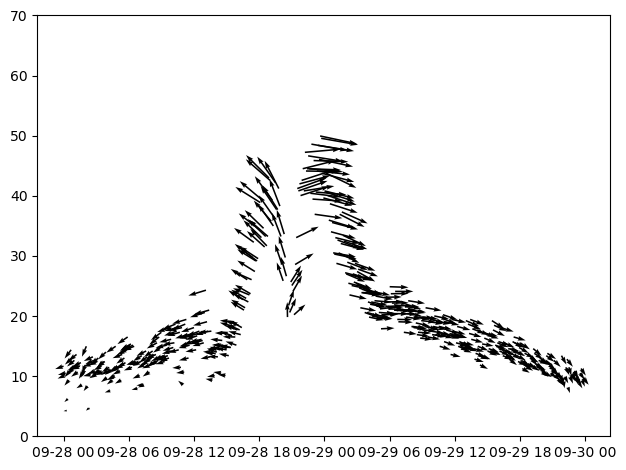

In [8]:
    ## change the direction values from degrees to radians 
rad = np.deg2rad(df3['direction'])
    
    ## U and V define directions of arrows
U = -(df3['speed']) * np.sin(rad)
V = -(df3['speed']) * np.cos(rad)

plt.quiver(df3.index, df3['speed'], U, V)
plt.ylim(ymax = 70, ymin = 0)

plt.tight_layout()

## Create Plot!

In [9]:
# Set date format for all following plots

date_form = dates.DateFormatter("%H:%M \n %m/%d")

In [10]:
plt.style.use('ggplot')

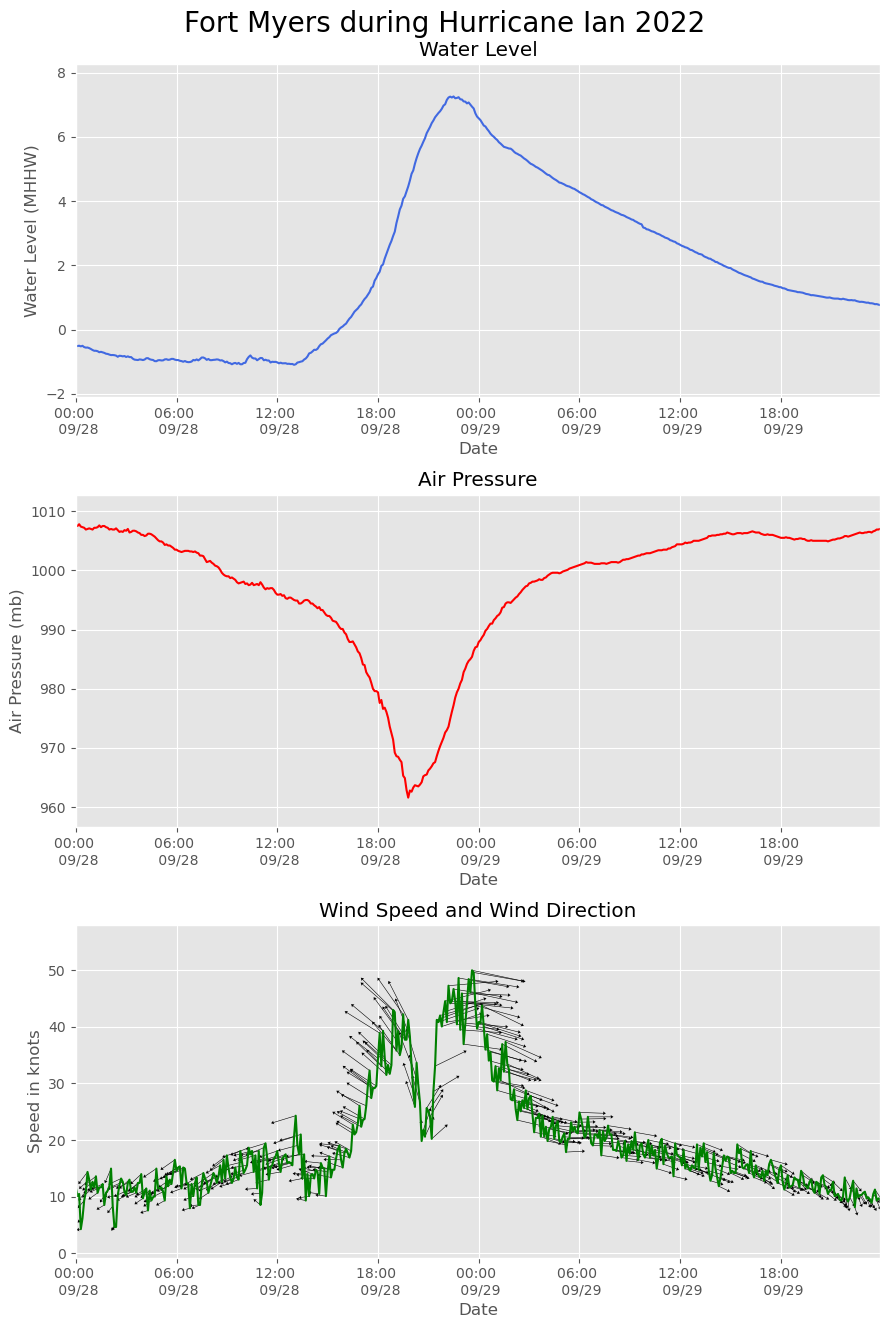

In [11]:
    ## create a figure with subplots (rows, columns, figsize)
fig, axs = plt.subplots(3, 1, figsize = (9, 4.5 * 3))
plt.suptitle('Fort Myers during Hurricane Ian 2022', size = 20)

    ## assign data to axes and set titles, labels, and limits
    ## Water Level
axs[0].plot(df['Water Level'], color = 'royalblue')
axs[0].set_title('Water Level')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Water Level (MHHW)')
axs[0].set_ylim(ymax=max(df['Water Level']+1), ymin=min(df['Water Level'])-1)
axs[0].set_xlim(xmax=df.index[-1], xmin=df.index[0])
axs[0].xaxis.set_major_formatter(date_form)

    ## Air Pressure 
axs[1].plot(df2['Air Pressure'], color = 'red')
axs[1].set_title('Air Pressure')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Air Pressure (mb)')
axs[1].set_ylim(ymax=max(df2['Air Pressure']+5), ymin=min(df2['Air Pressure'])-5)
axs[1].set_xlim(xmax=df.index[-1], xmin=df.index[0])
axs[1].xaxis.set_major_formatter(date_form)

    ## Wind Speed and Wind Direction 
axs[2].plot(df3['speed'], color = 'green')
axs[2].quiver(df3.index, df3['speed'], U, V, color = 'black', width = 0.0007, headwidth = 6.5)
axs[2].set_title('Wind Speed and Wind Direction')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Speed in knots')
axs[2].set_ylim(ymax=max(df3['speed']+8), ymin=min(df3['speed'])-5)
axs[2].set_xlim(xmax=df.index[-1], xmin=df.index[0])
axs[2].xaxis.set_major_formatter(date_form)

    ## add space between plots
plt.tight_layout(h_pad = 1)

## Animate!

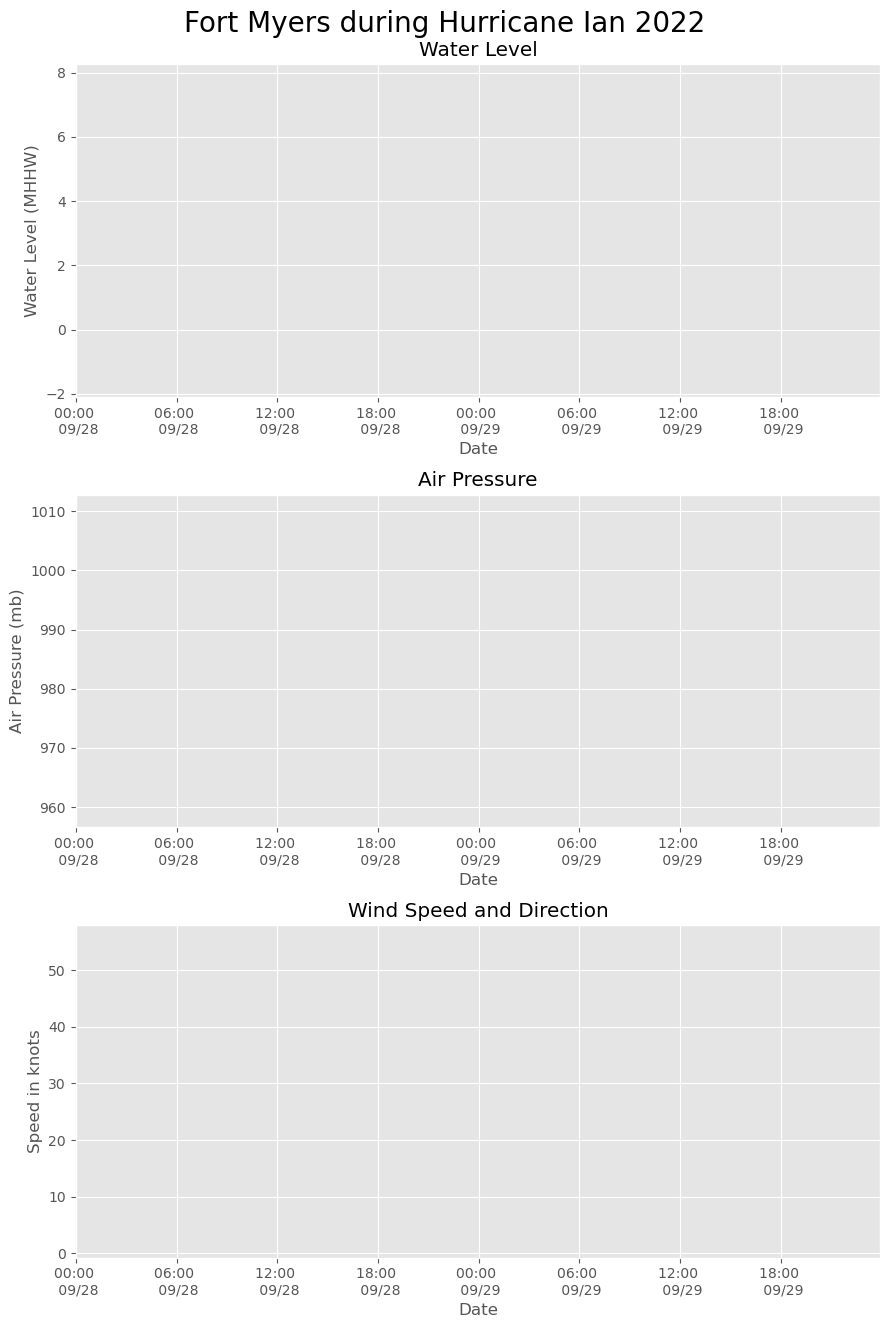

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(9, 4.5 * 3))
plt.suptitle('Fort Myers during Hurricane Ian 2022', size = 20)

    ## edit title and other labels/ limits
    ## Water Level
wl = axs[0].plot([], [])
axs[0].set_title('Water Level')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Water Level (MHHW)')
axs[0].set_ylim(ymax=max(df['Water Level']+1), ymin=min(df['Water Level'])-1)
axs[0].set_xlim(xmax=df.index[-1], xmin=df.index[0])
axs[0].xaxis.set_major_formatter(date_form)

    ## Air Pressure
ap = axs[1].plot([], [])
axs[1].set_title('Air Pressure')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Air Pressure (mb)')
axs[1].set_ylim(ymax=max(df2['Air Pressure']+5), ymin=min(df2['Air Pressure'])-5)
axs[1].set_xlim(xmax=df.index[-1], xmin=df.index[0])
axs[1].xaxis.set_major_formatter(date_form)

    ## Wind Speed and Wind Direction
wd = axs[2].plot([], [])
axs[2].quiver([], [], [], [], color = 'green', width = 0.0007, headwidth = 6.5)
# axs[2].quiver([], [], [], [])
axs[2].set_title('Wind Speed and Direction')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Speed in knots')
axs[2].set_ylim(ymax=max(df3['speed']+8), ymin=min(df3['speed'])-5)
axs[2].set_xlim(xmax=df.index[-1], xmin=df.index[0])
axs[2].xaxis.set_major_formatter(date_form)

    ## define lines to use in animation
lines = tuple(wl) + tuple(ap) + tuple(wd)

    ## define the start and end indices
a = df.index
b = df['Water Level']
c = df2['Air Pressure']
d = df3['speed']

    ## update the lines in the subplot 
def update(frame):
    lines[0].set_data(a[:frame], b[:frame])
    lines[1].set_data(a[:frame], c[:frame])
    lines[2].set_data(a[:frame], d[:frame])
    axs[2].quiver(a[:frame], d[:frame], U[:frame], V[:frame], color = 'black', width = 0.0007, headwidth = 6.5)
        # matplotlib does not currently have a function like set_data for quiver but this fix may be implemented soon
    return lines

    ##
def init():
    for line in lines:
        line.set_data([], [])
        lines[0].set_color('royalblue')
        lines[1].set_color('red')
        lines[2].set_color('green')
    return lines


    ## create the animation
ani = FuncAnimation(fig, update, frames=range(0,len(a),5), init_func=init, interval=100, blit=True)
    # frames can be updated to plot more or less data at once. Currently plots an additional 5 data points each consecutive frame


    ## add space between subplots
plt.tight_layout(h_pad = 1)

In [13]:
%%time

writer = FFMpegWriter(fps = 50) # fps = frames per second (the lower the slower)
ani.save('CO-OPSDataAnimation.mp4', writer = writer)

CPU times: total: 57.6 s
Wall time: 57.7 s
